## imports

In [199]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

## dataset

In [6]:
data_amba = []

with open("CSV/AMBA.csv", "r") as file:
    for line in file.readlines():
        row = line.replace("\n", "").split(",")
        data_amba.append(row)

df_amba = pd.DataFrame(data_amba)
df_amba.columns = df_amba.iloc[0]
df_amba = df_amba[1:]
df_amba = df_amba.set_index("Date")
#df_amba

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,52.000000,60.000000,48.869999,60.000000,60.000000,8163500
2015-01-08,59.150002,63.200001,55.099998,57.950001,57.950001,13982600
2015-01-15,58.430000,60.439999,53.380001,59.110001,59.110001,6667900
2015-01-22,59.470001,59.689999,54.900002,57.000000,57.000000,6078600
2015-01-29,56.939999,57.919998,54.320000,56.520000,56.520000,5745800
...,...,...,...,...,...,...
2018-08-30,40.009998,40.540001,34.330002,38.910000,38.910000,15527400
2018-09-06,38.900002,41.000000,38.060001,40.099998,40.099998,5513200
2018-09-13,40.299999,40.639999,35.009998,36.480000,36.480000,5487700


In [57]:
df_amba["Adj Close"] = df_amba["Adj Close"].astype(float)
#type(df_amba["Adj Close"][1])
#df_amba["Adj Close"][0] 

In [69]:
weekly_return_amba = []

for i in range(1, len(df_amba["Adj Close"])):
    #print(df_amba["Adj Close"][i])
    weekly_return_amba.append((df_amba["Adj Close"][i] - df_amba["Adj Close"][i-1]) / df_amba["Adj Close"][i-1])
    
#weekly_return_amba

[-0.03416664999999999,
 0.02001725590996964,
 -0.035696176015967196,
 -0.008421052631578892,
 -0.02972399150743099,
 -0.057622173595915455,
 0.09597521284829728,
 0.1915607201899844,
 0.0019262854326947386,
 0.01271813016630596,
 0.015770954332463987,
 0.06339854983894629,
 0.0055427334656924865,
 0.003898911154836477,
 -0.0013391991787653934,
 0.01072821509990618,
 -0.025208994618190483,
 -0.004899959100313602,
 0.1797291590790705,
 0.04208692173913047,
 0.06430804620520846,
 0.18063973737655298,
 0.08225607256497117,
 -0.1687802052986941,
 0.0027558957235412906,
 -0.04348252974526498,
 0.08989227572782789,
 0.1533753992408945,
 -0.03902040000000003,
 -0.022680920636417534,
 -0.043459364360033954,
 -0.0491595079738435,
 -0.14506880872581054,
 -0.0836127440600575,
 -0.1647963101440726,
 0.03432158559483586,
 -0.11621011013837886,
 -0.07668955104649315,
 0.06956220679075613,
 -0.10063098041367119,
 -0.0354380464112251,
 0.05371132140453789,
 0.009203539823008904,
 -0.02928800420904952,


In [54]:
data_goog = []

with open("CSV/GOOG.csv", "r") as file:
    for line in file.readlines():
        row = line.replace("\n", "").split(",")
        data_goog.append(row)

df_goog = pd.DataFrame(data_goog)
df_goog.columns = df_goog.iloc[0]
df_goog = df_goog[1:]
df_goog = df_goog.set_index("Date")
#df_goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,527.561584,529.815369,498.281952,499.727997,499.727997,8472397
2015-01-08,496.626526,503.537537,486.225067,499.498627,499.498627,12357935
2015-01-15,504.185760,517.858215,496.397156,516.621643,516.621643,9514852
2015-01-22,520.052185,540.685547,508.603638,508.603638,508.603638,10090226
2015-01-29,509.600891,538.391846,499.827728,521.328674,521.328674,16344852
...,...,...,...,...,...,...
2018-08-30,1244.229980,1253.635010,1162.000000,1186.479980,1186.479980,7040100
2018-09-06,1186.300049,1186.300049,1152.000000,1162.819946,1162.819946,6910000
2018-09-13,1170.739990,1180.425049,1154.030029,1171.089966,1171.089966,6076700


In [74]:
df_goog["Adj Close"] = df_goog["Adj Close"].astype(float)
weekly_return_goog = []

for i in range(1, len(df_goog["Adj Close"])):
    #print(df_goog["Adj Close"][i])
    weekly_return_goog.append((df_goog["Adj Close"][i] - df_goog["Adj Close"][i-1]) / df_goog["Adj Close"][i-1])
    
#weekly_return_goog

[-0.00045898969314704446,
 0.034280406540536795,
 -0.0155200718139483,
 0.02501955363520225,
 0.02526971689264894,
 0.0069593462819749225,
 0.007726603073239316,
 0.05424082764563339,
 -0.03870095792741287,
 0.01509481588017422,
 -0.0012778741774579772,
 -0.029036260031057335,
 -0.0017509382992263788,
 -0.01676478632366282,
 0.01283495554915005,
 0.02080687225280414,
 -0.045275816329699015,
 0.010301065008452397,
 0.018220658379787997,
 0.0009641885896048405,
 0.0009633746849592885,
 -0.006699850110861545,
 -0.013844103620920598,
 0.016211345724004348,
 -0.029748622632729416,
 -0.009600662541740912,
 0.08395401306576973,
 0.18185714589600016,
 -0.04556711084973669,
 0.018752134146606404,
 0.024511429819454585,
 0.0020316968949958664,
 -0.0488425296229071,
 -0.022716375733482758,
 -0.0026370673060506556,
 0.03796189140373224,
 -0.021415760603030153,
 -0.02239861548939405,
 0.05578383838191595,
 0.013699464794650906,
 -0.01313039553185187,
 0.1094599035836643,
 0.02126372500853543,
 0.01

In [12]:
data_nflx = []

with open("CSV/NFLX.csv", "r") as file:
    for line in file.readlines():
        row = line.replace("\n", "").split(",")
        data_nflx.append(row)

df_nflx = pd.DataFrame(data_nflx)
df_nflx.columns = df_nflx.iloc[0]
df_nflx = df_nflx[1:]
df_nflx = df_nflx.set_index("Date")
#df_nflx

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,49.151428,50.331429,45.661430,46.742859,46.742859,57527400
2015-01-08,47.119999,48.020000,45.264286,46.320000,46.320000,70730800
2015-01-15,46.547142,59.240002,45.844288,58.468571,58.468571,138819100
2015-01-22,58.571430,65.339996,57.828571,63.208572,63.208572,130517800
2015-01-29,63.204285,65.467140,61.955715,64.101433,64.101433,70224700
...,...,...,...,...,...,...
2018-08-30,365.000000,376.809998,335.829987,341.179993,341.179993,39622400
2018-09-06,347.440002,370.429993,341.250000,369.950012,369.950012,44587100
2018-09-13,371.910004,377.609985,349.570007,366.959991,366.959991,42485200


In [75]:
df_nflx["Adj Close"] = df_nflx["Adj Close"].astype(float)
weekly_return_nflx = []

for i in range(1, len(df_nflx["Adj Close"])):
    #print(df_nflx["Adj Close"][i])
    weekly_return_nflx.append((df_nflx["Adj Close"][i] - df_nflx["Adj Close"][i-1]) / df_nflx["Adj Close"][i-1])
    
#weekly_return_nflx

[-0.009046494139350837,
 0.26227484887737473,
 0.08106921238078488,
 0.014125631567819687,
 0.013772703022099441,
 0.04434044459642633,
 0.006883298879264745,
 -0.01789554965909149,
 -0.06296700844930696,
 -0.03877871872121947,
 -0.0032378309442722235,
 -0.020462356846473073,
 0.0683336365503156,
 0.07728564753823394,
 0.1729272320530559,
 0.009270556641464109,
 -0.004104137862478306,
 0.03491277242278169,
 0.07140027851821597,
 0.01201868440118609,
 -0.011669289719214306,
 0.07952901302735753,
 -0.01668899709422292,
 0.028352725440223683,
 -0.03412858290983493,
 -0.001373097905209433,
 0.04943853432541584,
 0.13624786924226642,
 -0.039641237668161494,
 0.15530441435740733,
 -0.025866922850755147,
 0.012861969747540067,
 -0.09773882676943835,
 -0.04258599044545507,
 -0.0593702758086063,
 0.049405142165759086,
 -0.05774406115019099,
 0.05292140307943313,
 0.04687193401371423,
 0.019704024416355652,
 -0.111312743046918,
 0.0800327080444336,
 0.07797731347890414,
 -0.010434037428302451,
 

In [13]:
data_orcl = []

with open("CSV/ORCL.csv", "r") as file:
    for line in file.readlines():
        row = line.replace("\n", "").split(",")
        data_orcl.append(row)

df_orcl = pd.DataFrame(data_orcl)
df_orcl.columns = df_orcl.iloc[0]
df_orcl = df_orcl[1:]
df_orcl = df_orcl.set_index("Date")
#df_orcl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,45.020000,45.189999,42.990002,43.150002,38.902618,66171300
2015-01-08,43.630001,44.099998,42.459999,43.060001,38.926853,75115700
2015-01-15,43.480000,44.029999,42.250000,43.490002,39.315571,63402700
2015-01-22,43.950001,45.330002,42.580002,42.689999,38.592354,74295500
2015-01-29,42.820000,43.160000,41.560001,42.419998,38.348282,77853700
...,...,...,...,...,...,...
2018-08-30,48.889999,48.889999,47.790001,48.040001,45.857059,66725700
2018-09-06,47.950001,49.470001,47.330002,49.340000,47.097988,91296500
2018-09-13,49.279999,49.939999,47.360001,49.430000,47.183899,125771400


In [76]:
df_orcl["Adj Close"] = df_orcl["Adj Close"].astype(float)
weekly_return_orcl = []

for i in range(1, len(df_orcl["Adj Close"])):
    #print(df_orcl["Adj Close"][i])
    weekly_return_orcl.append((df_orcl["Adj Close"][i] - df_orcl["Adj Close"][i-1]) / df_orcl["Adj Close"][i-1])
    
#weekly_return_orcl

[0.0006229657860045421,
 0.009985857320652075,
 -0.018395179863978022,
 -0.006324361556177753,
 0.02215916739112335,
 0.017066538619474193,
 -0.008390067148981824,
 -0.00274424590418393,
 -0.0490711900241398,
 0.06414298161211388,
 -0.027192658572748173,
 0.0002327791245618711,
 0.003959003312762558,
 0.023990123380255392,
 -0.010002410104577716,
 0.02709560052623523,
 -0.03286396592622507,
 0.012251705578887764,
 0.011418216812829927,
 -0.003387254334648679,
 -0.003851479556266697,
 -0.0006821458880666193,
 0.02207544610958834,
 -0.08260943530885546,
 -0.023301058204767158,
 -0.011679728743231478,
 0.029473533312227664,
 -0.0335869004502715,
 0.00938610352980018,
 -0.003769568902874104,
 -0.009081868021916845,
 0.006364484121403585,
 -0.06627855971197102,
 -0.0043348755077465715,
 0.009251734165989518,
 0.031814284938516665,
 -0.05957643214972325,
 0.0036119082173070604,
 0.042635583610144995,
 -0.010621469908484192,
 -0.013270267118100712,
 0.06171509775656178,
 0.04115231663318844,


In [14]:
data_tsla = []

with open("CSV/TSLA.csv", "r") as file:
    for line in file.readlines():
        row = line.replace("\n", "").split(",")
        data_tsla.append(row)

df_tsla = pd.DataFrame(data_tsla)
df_tsla.columns = df_tsla.iloc[0]
df_tsla = df_tsla[1:]
df_tsla = df_tsla.set_index("Date")
#df_tsla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,44.574001,44.650002,40.841999,42.189999,42.189999,96816000
2015-01-08,42.562000,42.759998,37.000000,38.537998,38.537998,150451500
2015-01-15,38.897999,39.736000,37.408001,39.313999,39.313999,87379500
2015-01-22,39.400002,41.723999,39.040001,39.874001,39.874001,83603000
2015-01-29,40.214001,44.296001,39.299999,43.709999,43.709999,94179500
...,...,...,...,...,...,...
2018-08-30,60.452000,61.062000,55.436001,56.147999,56.147999,143315500
2018-09-06,56.959999,58.500000,50.450001,58.108002,58.108002,317208000
2018-09-13,57.604000,60.528000,55.099998,59.804001,59.804001,224179500


In [77]:
df_tsla["Adj Close"] = df_tsla["Adj Close"].astype(float)
weekly_return_tsla = []

for i in range(1, len(df_tsla["Adj Close"])):
    #print(df_tsla["Adj Close"][i])
    weekly_return_tsla.append((df_tsla["Adj Close"][i] - df_tsla["Adj Close"][i-1]) / df_tsla["Adj Close"][i-1])
    
#weekly_return_tsla

[-0.08656082215124011,
 0.020135996685660754,
 0.014244340800842905,
 0.09620298700398798,
 -0.02630972377739024,
 -0.03919179889117011,
 -0.003423628260962037,
 -0.006478209817388242,
 -0.042975648166756766,
 0.03597597202498262,
 -0.03193655183780349,
 -0.03453419880251661,
 0.10704189418189156,
 0.0007705012760629492,
 0.05586291411909187,
 0.05928732227488149,
 -0.008690105025162096,
 0.05533140336178883,
 0.004811189044691672,
 0.012604890783811908,
 0.006304813482601235,
 0.0068677256114703655,
 0.038731592316146535,
 0.018278848387564845,
 0.015009277067541604,
 -0.052721547363122866,
 0.03208340461085252,
 0.01797528000210087,
 -0.015119292658392262,
 0.023917841710256953,
 -0.11831343948629472,
 0.07171348347217282,
 -0.11913810223581005,
 0.10162780425253085,
 0.0049255724868009255,
 0.05359366731763151,
 -0.0045376357571471175,
 -0.048494635390537194,
 -0.06618361513687598,
 -0.06501119007635758,
 -0.03130756711793537,
 0.013660739984733175,
 0.08766907136713632,
 -0.0541811

In [94]:
len(weekly_return_amba)
len(weekly_return_goog)
len(weekly_return_nflx)
len(weekly_return_orcl)
len(weekly_return_tsla)

195

In [92]:
df_stocks = pd.DataFrame({'AMBA': weekly_return_amba, 'GOOG': weekly_return_goog, 'NFLX': weekly_return_nflx, 'ORCL': weekly_return_orcl, 'TSLA': weekly_return_tsla}, index=df_amba.index[1:])
df_stocks

,AMBA,GOOG,NFLX,ORCL,TSLA
Date,,,,,
2015-01-08,-0.034167,-0.000459,-0.009046,0.000623,-0.086561
2015-01-15,0.020017,0.034280,0.262275,0.009986,0.020136
2015-01-22,-0.035696,-0.015520,0.081069,-0.018395,0.014244
2015-01-29,-0.008421,0.025020,0.014126,-0.006324,0.096203
2015-02-05,-0.029724,0.025270,0.013773,0.022159,-0.026310
...,...,...,...,...,...
2018-08-30,-0.028949,-0.050284,-0.072981,-0.017386,-0.079571
2018-09-06,0.030583,-0.019941,0.084325,0.027061,0.034908
2018-09-13,-0.090274,0.007112,-0.008082,0.001824,0.029187


## exploratory data analysis

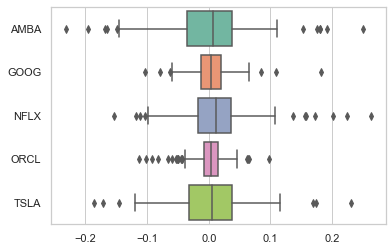

In [112]:
boxplot_returns = sns.boxplot(data=df_stocks, orient="h", palette="Set2")

In [151]:
avg_return_amba = df_stocks["AMBA"].mean()*100
avg_return_goog = df_stocks["GOOG"].mean()*100
avg_return_nflx = df_stocks["NFLX"].mean()*100
avg_return_orcl = df_stocks["ORCL"].mean()*100
avg_return_tsla = df_stocks["TSLA"].mean()*100

#print(avg_return_amba, avg_return_goog, avg_return_nflx, avg_return_orcl, avg_return_tsla)
percent_avg_returns = [avg_return_amba, avg_return_goog, avg_return_nflx, avg_return_orcl, avg_return_tsla]
percent_avg_returnsnp

[0.00929550478372682,
 0.4956843239489363,
 1.2298688016235604,
 0.15848191477494344,
 0.2902174643758332]

In [152]:
var_amba = df_stocks["AMBA"].var()*100
var_goog = df_stocks["GOOG"].var()*100
var_nflx = df_stocks["NFLX"].var()*100
var_orcl = df_stocks["ORCL"].var()*100
var_tsla = df_stocks["TSLA"].var()*100

percent_variences = [var_amba, var_goog, var_nflx, var_orcl, var_tsla]
percent_variences

[0.4662437645270469,
 0.09759318059863849,
 0.32777939895442376,
 0.0748468866122799,
 0.3483465355095528]

In [153]:
stddev_amba = df_stocks["AMBA"].std()*100
stddev_goog = df_stocks["GOOG"].std()*100
stddev_nflx = df_stocks["NFLX"].std()*100
stddev_orcl = df_stocks["ORCL"].std()*100
stddev_tsla = df_stocks["TSLA"].std()*100

percent_standard_deviations = [stddev_amba, stddev_goog, stddev_nflx, stddev_orcl, stddev_tsla]
percent_standard_deviations

[6.828204482344146,
 3.1239907265969675,
 5.725202170704749,
 2.735815904118548,
 5.902088914185831]

In [154]:
df_specs = pd.DataFrame([percent_avg_returns, percent_variences, percent_standard_deviations])
#df_specs.shape
df_specs.rename(index={0: 'Mean Return %', 1: 'Variance %', 2: 'Standard Deviation %'}, inplace=True)
df_specs.rename(columns={0: 'AMBA', 1: 'GOOG', 2: 'NFLX', 3: 'ORCL', 4: 'TSLA'}, inplace=True)
df_specs

,AMBA,GOOG,NFLX,ORCL,TSLA
Mean Return %,0.009296,0.495684,1.229869,0.158482,0.290217
Variance %,0.466244,0.097593,0.327779,0.074847,0.348347
Standard Deviation %,6.828204,3.123991,5.725202,2.735816,5.902089


In [155]:
cov_matrix = df_stocks.cov()
cov_matrix

,AMBA,GOOG,NFLX,ORCL,TSLA
AMBA,0.004662,0.000724,0.001039,0.000369,0.000782
GOOG,0.000724,0.000976,0.000844,0.000303,0.000524
NFLX,0.001039,0.000844,0.003278,0.000361,0.001029
ORCL,0.000369,0.000303,0.000361,0.000748,0.000381
TSLA,0.000782,0.000524,0.001029,0.000381,0.003483


In [243]:
df_specs[:1]
#df_specs.iloc[0]

,AMBA,GOOG,NFLX,ORCL,TSLA
Mean Return %,0.009296,0.495684,1.229869,0.158482,0.290217


In [278]:
number_of_portfolios = 2000
portfolio_returns = []
portfolio_risk = []
sharpe_ratio_port = []
risk_free_rate = 0.0002

for port in range (number_of_portfolios):
    mean_returns = np.array(percent_avg_returns)
    weights = np.random.random_sample((len(mean_returns)))
    weights = weights / np.sum(weights)
    #print(type(weights))
    #print(weights)
    #return
    annualize_return = np.sum((np.array(df_specs[:1]) * weights.T) * 52)
    #annualize_return
    portfolio_returns.append(annualize_return)    
    #portfolio_returns
    #variance
    matrix_covariance_portfolio = (cov_matrix) * 52
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance_portfolio, weights))
    #portfolio_variance
    portfolio_standard_deviation= np.sqrt(portfolio_variance) 
    portfolio_risk.append(portfolio_standard_deviation)
    #portfolio_risk
    #sharpe_ratio
    sharpe_ratio = ((annualize_return - risk_free_rate) / portfolio_standard_deviation)
    sharpe_ratio_port.append(sharpe_ratio)
    #sharpe_ratio_port
    #keep weights as well to find out later the weights from the optimized portfolio
    portfolio_weights.append(weights)
    
#portfolio_weights


[array([0.1519971 , 0.20862268, 0.2746167 , 0.21723345, 0.14753007]),
 array([0.01436618, 0.28728336, 0.10623552, 0.31623243, 0.27588252]),
 array([0.31250806, 0.29472953, 0.02503452, 0.35881772, 0.00891016]),
 array([0.17954069, 0.25703379, 0.19206193, 0.16698986, 0.20437373]),
 array([0.11294684, 0.35697022, 0.37790422, 0.00309038, 0.14908834]),
 array([0.2390158 , 0.33131604, 0.16683712, 0.09789566, 0.16493539]),
 array([0.32577229, 0.00346254, 0.12088824, 0.39571994, 0.15415699]),
 array([0.19130528, 0.14841625, 0.26917219, 0.1095741 , 0.28153218]),
 array([0.05873629, 0.28839626, 0.12543349, 0.38162094, 0.14581302]),
 array([0.00491006, 0.36623848, 0.16720179, 0.29671316, 0.16493651]),
 array([0.26144772, 0.17785099, 0.2552371 , 0.05719372, 0.24827047]),
 array([0.22968409, 0.22651324, 0.16418779, 0.27756872, 0.10204616]),
 array([0.23984921, 0.26236837, 0.24366713, 0.09659136, 0.15752394]),
 array([0.26115039, 0.19374591, 0.1696953 , 0.21066442, 0.16474399]),
 array([0.26530977, 

In [279]:
portfolio_risk = np.array(portfolio_risk)
portfolio_returns = np.array(portfolio_returns)
sharpe_ratio_port = np.array(sharpe_ratio_port)

#len(portfolio_risk)
#len(portfolio_returns)
#len(sharpe_ratio_port)

#portfolio_risk
#portfolio_returns
#shasharpe_ratio_port

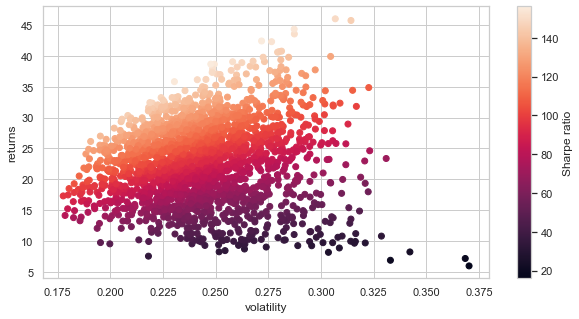

In [280]:
plt.figure(figsize=(10, 5))
plt.scatter(portfolio_risk, portfolio_returns, c=sharpe_ratio_port) 
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar(label='Sharpe ratio')

In [283]:
porfolio_metrics = [portfolio_returns, portfolio_risk, sharpe_ratio_port, portfolio_weights] 
#from Python list we create a Pandas DataFrame
portfolio_dfs = pd.DataFrame(porfolio_metrics)
portfolio_dfs = portfolio_dfs.T
#Rename the columns:
portfolio_dfs.columns = ['Port Returns','Port Risk','Sharpe Ratio','Portfolio Weights']

#convert from object to float the first three columns.
for col in ['Port Returns', 'Port Risk', 'Sharpe Ratio']:
    portfolio_dfs[col] = portfolio_dfs[col].astype(float)

portfolio_dfs = portfolio_dfs.dropna()
portfolio_dfs

,Port Returns,Port Risk,Sharpe Ratio,Portfolio Weights
0,9.676237,0.321036,30.139997,"[0.1519971040473694, 0.20862267532439716, 0.27..."
1,21.039898,0.247593,84.976840,"[0.014366177449498752, 0.28728335607089434, 0...."
2,21.221798,0.243860,87.023619,"[0.3125080618313906, 0.29472953117476147, 0.02..."
3,21.274351,0.240591,88.424513,"[0.17954068908767287, 0.2570337909921922, 0.19..."
4,24.833005,0.239522,103.676592,"[0.11294683712624987, 0.3569702190084344, 0.37..."
...,...,...,...,...
1995,12.773157,0.291207,43.862149,"[0.1069555559928675, 0.2495638187830178, 0.438..."
1996,25.056243,0.253929,98.673423,"[0.054651604931106774, 0.2764576114884005, 0.2..."
1997,16.991679,0.215806,78.734909,"[0.09996544379963129, 0.2949933099028789, 0.36..."
1998,29.658463,0.253994,116.767695,"[0.2086829241149231, 0.03610233181548453, 0.21..."


In [288]:
#portfolio with the highest Sharpe Ratio
Highest_sharpe_port = portfolio_dfs.iloc[portfolio_dfs['Sharpe Ratio'].idxmax()]
#portfolio with the minimum risk 
min_risk = portfolio_dfs.iloc[portfolio_dfs['Port Risk'].idxmin()]

print("Portfolio with the highest Sharpe Ratio:")
print()
print(Highest_sharpe_port)
print()
print()
print()
print("Portfolio with the minimum risk:")
print()
print(min_risk)


Portfolio with the highest Sharpe Ratio:

Port Returns                                                 38.685234
Port Risk                                                     0.247727
Sharpe Ratio                                                156.160009
Portfolio Weights    [0.08797492956769881, 0.057996568425538894, 0....
Name: 867, dtype: object



Portfolio with the minimum risk:

Port Returns                                                 17.304794
Port Risk                                                     0.177696
Sharpe Ratio                                                 97.383323
Portfolio Weights    [0.35061289132938434, 0.3791317047987045, 0.15...
Name: 1843, dtype: object
